<a href="https://colab.research.google.com/github/vimal9910/Fourth_capstone_project_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Projec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_column",30)


import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/Online Retail (1).xlsx'

In [4]:
# Read The Datset "Online Retail"
# The DatFile sometime wont readable due to its containt for encoding do "encoding = ISO-8859-1"
# Use Panda Library To read The CSV file
# .head() helps to read top 5 record of dataset
retail_df=pd.read_excel(file_path)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_df.shape

(541909, 8)

# **Data Wrangling**

In [7]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## **Observations**
**If InvoiceNo starts with C means it's a cancellation. We 
need to drop this entries.**

**There are null values in CustomerID and Description.**

In [8]:
# Let's check the null values count
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, 'visualising Missing Values')

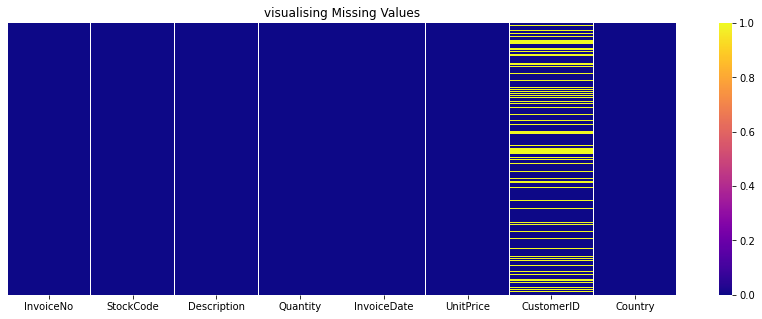

In [9]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title("visualising Missing Values")

# **Observations**

**Missing values in CustomerID and Description columns.**

**CustomerID is our identification feature so if its missing means other wont help us in analysis**

**Dropping that all missing datapoints**

In [10]:
retail_df.dropna(inplace=True)

In [11]:
retail_df.shape

(406829, 8)

**Our data got reduced.So we have 8 featurs and 406829 datapoints**

In [12]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


 **Here we can see that min value for Quantity column is negative.**

**UnitPrice has 0 as min value**

**Need to Explore these columns**

In [13]:
# dataframe have negative valiues in quantity.
#Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.
retail_df[retail_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [14]:
# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [16]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [17]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(retail_df[retail_df['UnitPrice']==0])

40

In [20]:
# taking unitprice values greater than 0.
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [22]:
retail_df.shape

(397884, 8)

# **Feature Engineering**

In [23]:

# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"]= pd.to_datetime(retail_df["InvoiceDate"],format="%d-%m-%y %H:%M")

In [25]:
retail_df["Year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [26]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [27]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [28]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [30]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


In [31]:
retail_df.shape

(397884, 16)

# **EDA(Exploratory Data Analysis)**

In [32]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [34]:
top_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


## **Top 10 items in terms of description(Name)**

Text(0.5, 1.0, 'Top 10 Products')

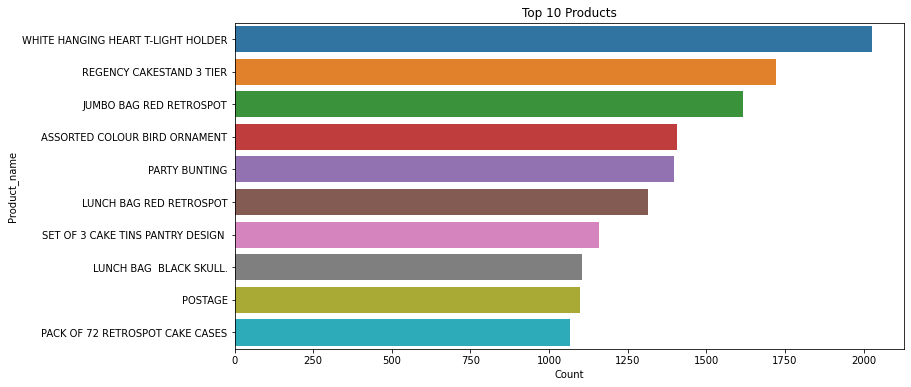

In [36]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 Products')

## Observations
WHITE HANGING HEART T-LIGHT HOLDER is the highest selling product almost 2018 units were sold

REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold

# **Bottom 10 items in terms of description(Name)**

In [37]:
bottom_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

,Product_name,Count
3867,BLUE FELT HANGING HEART WITH FLOWER,1
3868,GLASS CAKE COVER AND PLATE,1
3869,CRACKED GLAZE EARRINGS RED,1
3870,SCALLOP SHELL SOAP DISH,1
3871,NECKLACE+BRACELET SET PINK DAISY,1
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Bottom 10 Products')

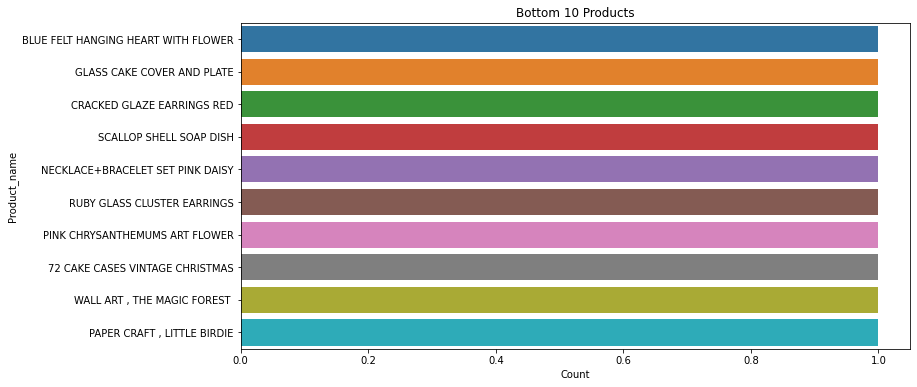

In [38]:
# Bottom 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 Products')

# **Top 10 items in terms of StockCode.**

In [50]:
top_10_StockCodes=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_StockCodes

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


In [51]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 products in terms of Stock Code')

KeyError: ignored

<Figure size 864x432 with 0 Axes>